Dans ce projet, nous allons apprendre à programmer un modele de machine learning appelé k-means.
Le clustering k-means est un algorithme d'apprentissage automatique non supervisé d'apprentissage automatique que vous pouvez utiliser pour trouver des clusters dans vos données,

Si vous cherchez à mettre en œuvre cet algorithme en l'implémentamt from scratch, cela vous aidera sur plusieurs points:

- A mieux le comprendre
- À construire votre portefeuille 
- À bien passer un entretien
- À personnaliser cet algorithme

A la fin de ce tutoriel, vous aurez une implémentation complète d'un algorithme de clustering k-means de clustering k-means et vous serez en mesure d'exécuter l'algorithme et voir comment les affectations des clusters changent à chaque iteration de l'algorithme k-means et le clustering convergera finalement et vous donnera des valeurs qui 
correspondent aux centroïdes de chaque groupe

### Importation de la bibliothèque pandas et numpy

In [1]:
import pandas as pd
import numpy as np

### Lecture de la data

In [2]:
players = pd.read_csv("/Users/mac/Desktop/Secure/Data/FIFA/players_22.csv")

/Users/mac/opt/anaconda3/envs/MLtensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


les données que nous allons utilisé sont ceux des joueurs de 
fifa, un jeu vidéo de football populaire et nous allons  
tenter de regrouper les joueurs grace à notre algorithme de clustering K-means.  

Donc, dans cet ensemble de données, chaque ligne correspond à 
un joueur spécifique, donc la première ligne est lionel  
Messi, la deuxième ligne est Robert Lewandowski. 
et ainsi de suite, et chaque colonne correspond à  
à un attribut de ce joueur, les positions 
qu'il joue, son classement général dans Fifa, etc.  

In [36]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


### Features selection

les cinq caractéristiques que nous allons examiner 
pour le clustering sont :
- l'évaluation globale (overal), 
- le potentiel, le classement le plus élevé qu'ils pourraient obtenir dans le futur (potential)
- leur valeur pour leur club actuel (wage_eur)
- leur salaire, c'est-à-dire leur salaire annuel (value_eur)
- leur âge (age)

Nous allons donc regrouper les joueurs en fonction de ces  
cinq caractéristiques

In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

### Data cleaning

In [30]:
players = players.dropna(subset=features)

In [31]:
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


### Plan de conception de l'algorithme K-MEANS

- Mettre les données à l'échelle pour normaliser les valeurs
- Initialiser des centroïdes aléatoirement
- Assigner des étiquettes pour chaque point de données
- Créer de nouveaux centroïdes
- Dessiner les centroïdes
- Répétez 3-5 fois jusqu'à ce que les centroïdes ne changent plus

### Mettre les données à l'échelle pour normaliser les valeurs

In [7]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [8]:
data

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185
...,...,...,...,...,...
19234,1.000000,1.652174,1.014306,1.003144,3.222222
19235,1.000000,3.173913,1.000000,1.005206,2.111111
19236,1.000000,2.304348,1.000000,1.004691,2.851852
19237,1.000000,3.391304,1.000000,1.005206,2.111111


In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


### Initialiser des centroïdes aléatoirement

In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(data, 5)

In [12]:
centroids

,0,1,2,3,4
overall,4.260870,5.782609,5.565217,4.043478,3.826087
potential,4.913043,3.608696,7.304348,6.652174,4.260870
wage_eur,1.157368,1.001431,1.042918,1.071531,1.014306
value_eur,1.034331,1.092324,1.006237,1.045930,1.024022
age,3.962963,5.814815,2.851852,2.481481,2.851852


### Assigner des étiquettes pour chaque point de données

In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(data, centroids)

In [15]:
labels.value_counts()

1    5579
2    4804
0    3978
3    2841
4    1963
dtype: int64

### Créer de nouveaux centroïdes

In [16]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

### Dessiner les centroïdes

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

### Répétez 3-5 fois jusqu'à ce que les centroïdes ne changent plus

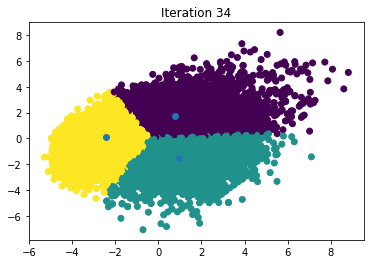

In [23]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [24]:
centroids

,0,1,2
overall,6.324628,5.200636,3.436536
potential,7.100439,4.894208,5.357557
wage_eur,1.456630,1.130961,1.031374
value_eur,1.311183,1.049892,1.029343
age,3.874397,5.963956,2.674807


In [28]:
labels.value_counts()

1    7188
2    6162
0    5815
dtype: int64

In [35]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


### Comparaison avec le moduke KMeans de la bibliotheque sklearn

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [60]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,5.223315,6.798717,3.874959
potential,4.895746,7.241172,5.668395
wage_eur,1.125410,1.723741,1.043894
value_eur,1.044529,1.456049,1.039343
age,6.115523,4.478042,2.894443
